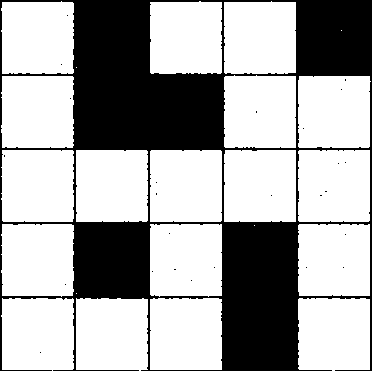

In [75]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
im = cv2.imread('/content/Screenshot 2024-04-06 112403.png')
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

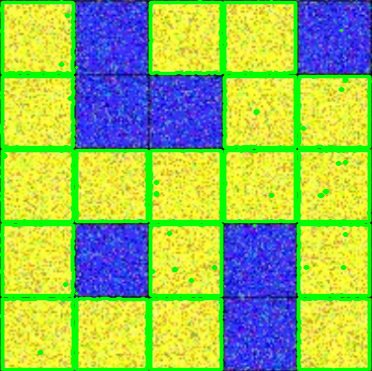

In [77]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)


image_copy = im.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)


cv2_imshow(image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

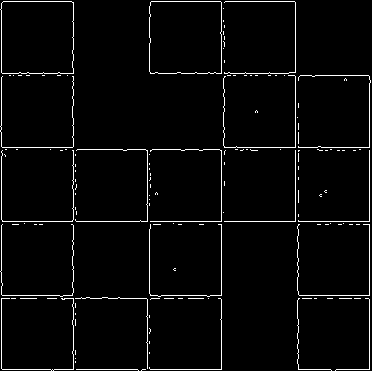

In [78]:
t_lower = 50
t_upper = 600

edge = cv2.Canny(thresh, t_lower, t_upper)


cv2_imshow(edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
import PIL
from PIL import Image
img = PIL.Image.open("/content/Screenshot 2024-04-06 112403.png")
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

372x371


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255,   0, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
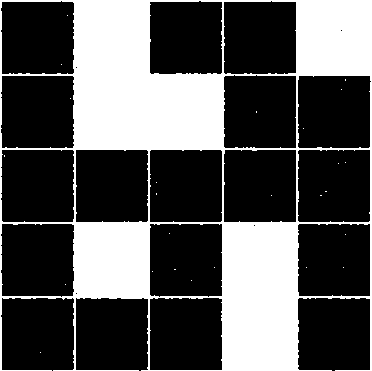

In [80]:
binary_image = preprocess_image('/content/image_thres1.jpg')
binary_image

In [81]:
print(binary_image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255   0 ... 255 255 255]
 ...
 [255 255   0 ...   0 255 255]
 [255 255   0 ...   0 255 255]
 [255 255 255 ... 255 255 255]]


In [82]:
def detect_grid(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    cell_size = w // 5
    return cell_size, (h // cell_size, w // cell_size)
detect_grid(im)

(44, (1, 5))

I had done all Image processing Prequisite for plath planning. I am not able to speeecify coordinates of the cells of image due to which I am not able to proceed in path planning.

I am writing logic behind the path planning for given PS.
We can find the path by using DIJKISTRA Algorithm.
Dijkstra Algorithm is used to find shortest path for a single source grid with non negative weights. First we will give cost 0 to the source grid cell and cost of all other cells will be infinity , then we will move along the adjacent cell horizontally or vertically from the source cell and update cost of each cell according to the relaxation  formula that is if(d[u] + c[u,v] < d[v]) then , d[v]=d[u]+c(u,v)  where d[u]=cost of grid cell u(that is the grid cell on which we are currently), d[v]=cost of grid cell v(that is the grid cell adjacent to u (horizontally or vertically)) , c(u,v)=edge cost.
Dijkstra Algorithm follows a Greedy approach.